## Лабораторная работа 5 (Store)
Цель: проанализировать размеры складских помещений в магазине и сравнить

In [2]:
import pandas as pd
df = pd.read_csv(".//static//csv//Stores.csv")
# удаляем id
df = df.drop(df.columns[0], axis=1)

print(df.head())
print(df.columns)

   Store_Area  Items_Available  Daily_Customer_Count  Store_Sales
0        1659             1961                   530        66490
1        1461             1752                   210        39820
2        1340             1609                   720        54010
3        1451             1748                   620        53730
4        1770             2111                   450        46620
Index(['Store_Area', 'Items_Available', 'Daily_Customer_Count', 'Store_Sales'], dtype='object')


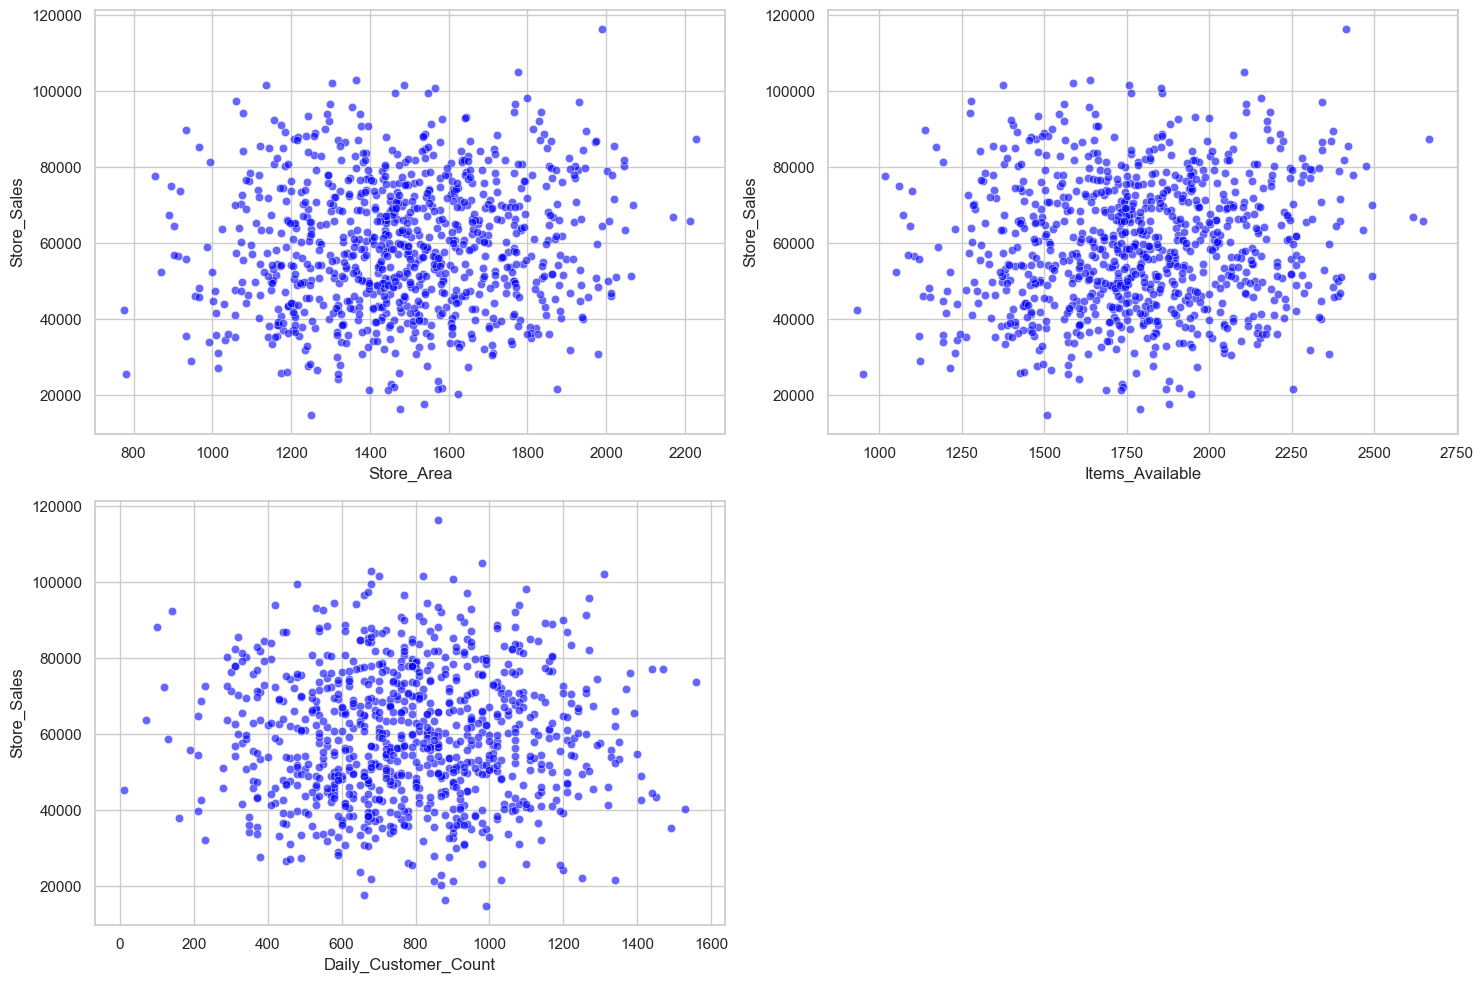

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Создание фигуры
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.scatterplot(x=df["Store_Area"], y=df["Store_Sales"], alpha=0.6, color="blue")#Площадь vs Продажи

plt.subplot(2, 2, 2)
sns.scatterplot(x=df["Items_Available"], y=df["Store_Sales"], alpha=0.6, color="blue") #Количество ассортимента vs продажи

plt.subplot(2, 2, 3)
sns.scatterplot(x=df["Daily_Customer_Count"], y=df["Store_Sales"], alpha=0.6, color="blue") #Количество посетителей vs Цена

# Упорядочиваем графики
plt.tight_layout()
plt.show()

Понижение размерности и визуализация

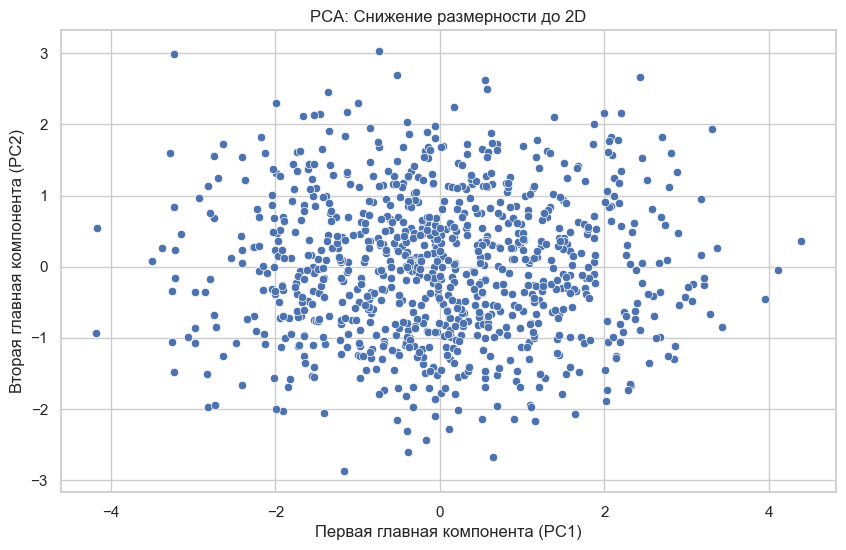

In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Оставляем только числовые столбцы для анализа
df_numerical = df[['Store_Area', 'Items_Available', 'Daily_Customer_Count', 'Store_Sales']]

# Стандартизируем данные
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numerical)

# Применяем PCA для понижения размерности до 2 компонентов
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Преобразуем результат в DataFrame для удобства
df_pca_df = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])

# Визуализируем результат
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=df_pca_df)
plt.title('PCA: Снижение размерности до 2D')
plt.xlabel('Первая главная компонента (PC1)')
plt.ylabel('Вторая главная компонента (PC2)')
plt.show()
plt.show()

Выбор кол-ва кластеров на основе инерции (метод локтя) (неиерархического алгоритма кластеризации)

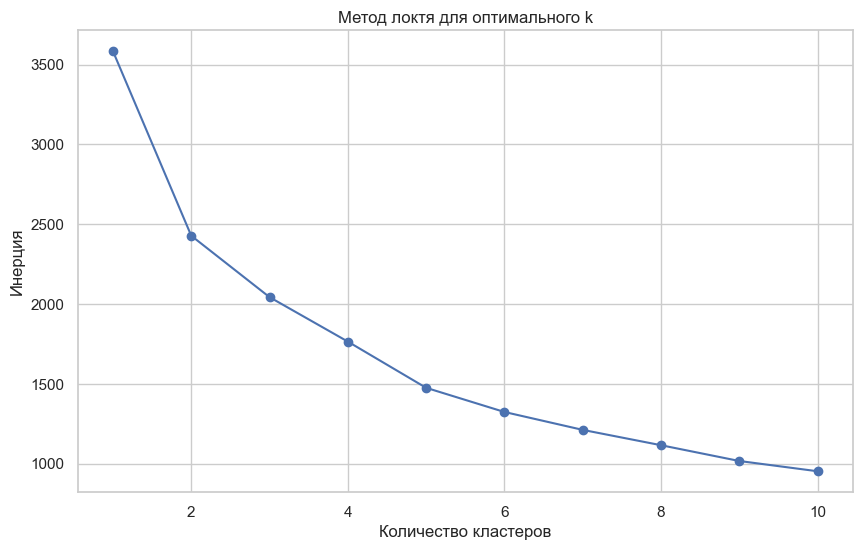

In [15]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Оставляем только числовые столбцы для анализа
df_numerical = df[['Store_Area', 'Items_Available', 'Daily_Customer_Count', 'Store_Sales']]
# Стандартизируем данные
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numerical)

# Оценка инерции для разных значений K
inertias = []
clusters_range = range(1, 11)  # Пробуем K от 1 до 10
for i in clusters_range:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    inertias.append(kmeans.inertia_)

# График инерции
plt.figure(figsize=(10, 6))
plt.plot(clusters_range, inertias, marker='o')
plt.title('Метод локтя для оптимального k')
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция')
plt.grid(True)
plt.show()


На основе инерции можно предположить, что оптимально взять 2-4 кластера

Выбор кол-ва кластеров на основе коэф-а силуэта (неиерархического алгоритма кластеризации)

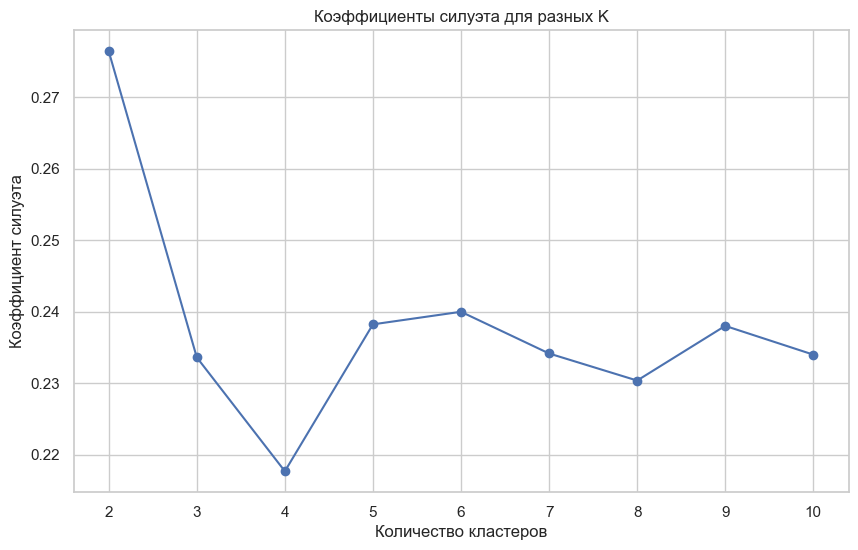

In [17]:
from sklearn.metrics import silhouette_score

# Оставляем только числовые столбцы для анализа
df_numerical = df[['Store_Area', 'Items_Available', 'Daily_Customer_Count', 'Store_Sales']]

# Стандартизируем данные
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numerical)

# Оценка коэффициента силуэта для разных значений K
silhouette_scores = []
clusters_range = range(2, 11)  # Пробуем K от 2 до 10 (минимум 2 кластера для оценки силуэта)
for i in clusters_range:  
    kmeans = KMeans(n_clusters=i, random_state=42)
    labels = kmeans.fit_predict(df_scaled)  # Получаем метки кластеров
    score = silhouette_score(df_scaled, labels)  # Вычисляем коэффициент силуэта
    silhouette_scores.append(score)

# График коэффициентов силуэта
plt.figure(figsize=(10, 6))
plt.plot(clusters_range, silhouette_scores, marker='o')
plt.title('Коэффициенты силуэта для разных K')
plt.xlabel('Количество кластеров')
plt.ylabel('Коэффициент силуэта')
plt.grid(True)
plt.show()


Значение коэф-а силуэта наибольшее при 2 кластерах, т.е. выгодно взять 2 кластера.

Иерархическая кластеризация

Иерархический агломеративный алгоритм: последовательное объединение исходных элементов и уменьшение числа кластеров (построение кластеров снизу вверх).

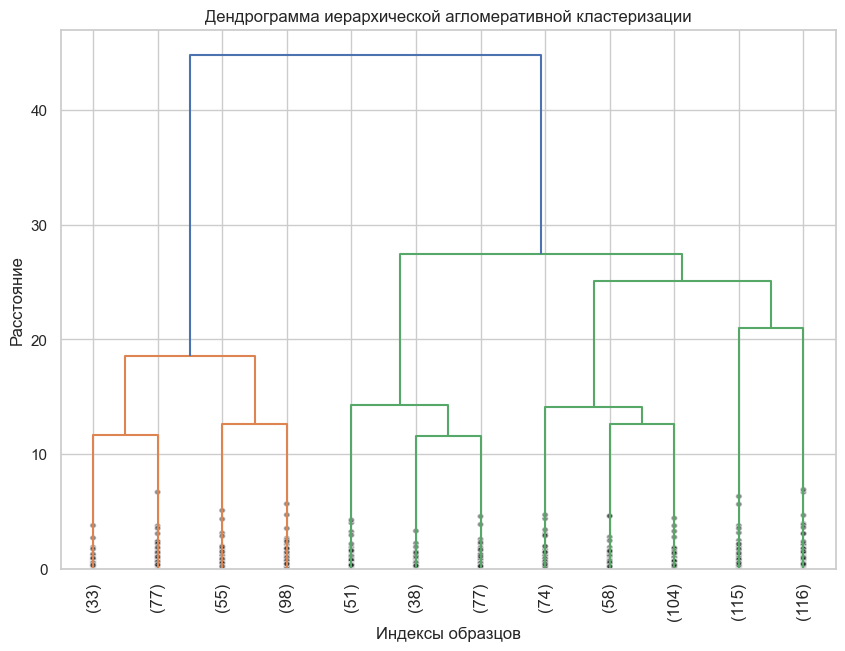

In [18]:
from scipy.cluster import hierarchy

linkage_matrix = hierarchy.linkage(df_scaled, method='ward')

plt.figure(figsize=(10, 7))
hierarchy.dendrogram(
    linkage_matrix, 
    truncate_mode='lastp', 
    p=12, 
    leaf_rotation=90., 
    leaf_font_size=12., 
    show_contracted=True
)
plt.title('Дендрограмма иерархической агломеративной кластеризации')
plt.xlabel('Индексы образцов')
plt.ylabel('Расстояние')
plt.show()


Визуализация кластеризации

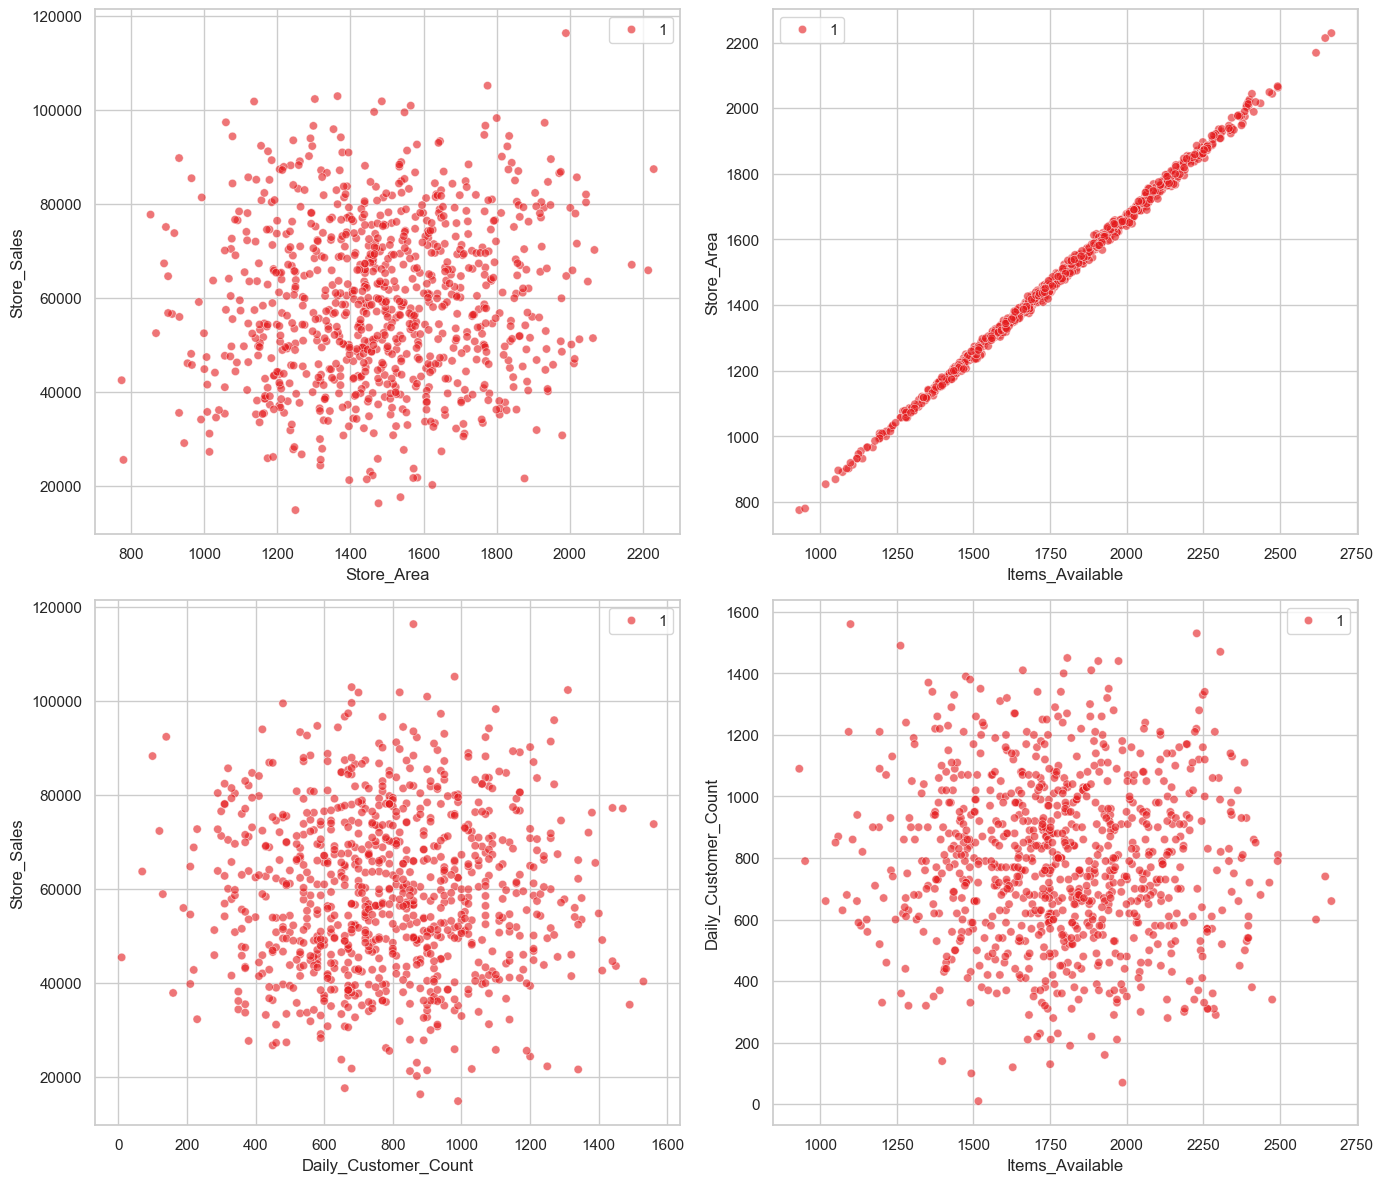

In [ ]:
from scipy.cluster.hierarchy import fcluster
# Визуализация кластеров
plt.figure(figsize=(14, 12))
result = fcluster(linkage_matrix, t=60, criterion='distance')

plt.subplot(2, 2, 1)
sns.scatterplot(x=df["Store_Area"], y=df["Store_Sales"], hue=result, palette="Set1", alpha=0.6)#Store_Area vs Store_Sales

plt.subplot(2, 2, 2)
sns.scatterplot(x=df["Items_Available"], y=df["Store_Area"], hue=result, palette="Set1", alpha=0.6)#Items_Available vs Store_Area

plt.subplot(2, 2, 3)
sns.scatterplot( x=df["Daily_Customer_Count"], y=df["Store_Sales"], hue=result, palette="Set1", alpha=0.6)#Daily_Customer_Count vs Store_Sales

plt.subplot(2, 2, 4)
sns.scatterplot(x=df["Items_Available"], y=df["Daily_Customer_Count"], hue=result, palette="Set1",alpha=0.6)#Items_Available vs Daily_Customer_Count

# Настройка графиков
plt.tight_layout()
plt.show()

Неиерархический алгоритм кластеризации

Центры кластеров:
 [[ 1745.60833333  2093.9625       640.70833333 65702.91666667]
 [ 1334.08658009  1600.46320346   639.17748918 44322.25108225]
 [ 1590.27536232  1908.01449275  1048.26086957 55292.41545894]
 [ 1259.72477064  1511.40825688   853.94495413 72138.0733945 ]]


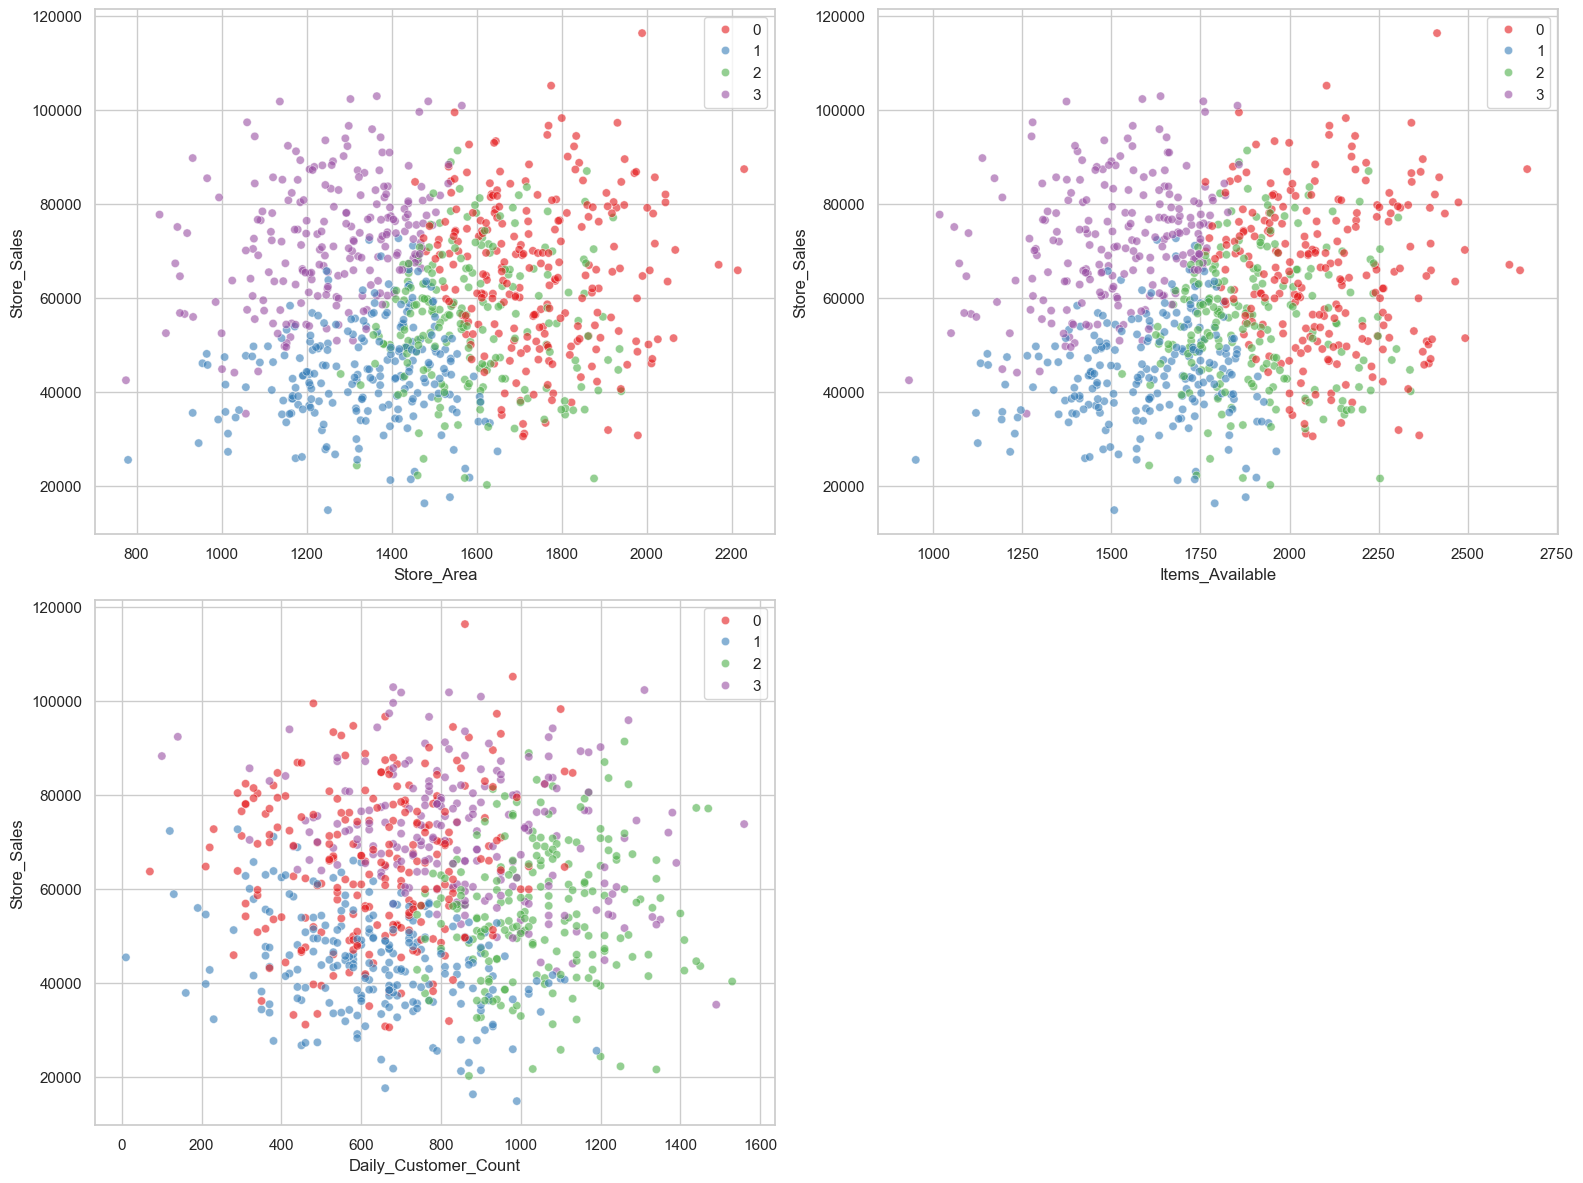

In [21]:
features_used = [
    "Store_Area",
    "Items_Available",
    "Daily_Customer_Count",
    "Store_Sales"
]
data_to_scale = df[features_used]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_to_scale)

random_state = 42
kmeans = KMeans(n_clusters=4, random_state=random_state)
labels = kmeans.fit_predict(data_scaled)
centers = kmeans.cluster_centers_

# Отображение центроидов
centers_original = scaler.inverse_transform(centers)  # Обратная стандартизация
print("Центры кластеров:\n", centers_original)


plt.figure(figsize=(16, 12))
plt.subplot(2, 2, 1)
sns.scatterplot(x=df["Store_Area"],y=df["Store_Sales"],hue=labels,palette="Set1",alpha=0.6) # Визуализация результатов кластеризации KMeans


plt.subplot(2, 2, 2)
sns.scatterplot(x=df["Items_Available"],y=df["Store_Sales"],hue=labels,palette="Set1",alpha=0.6)

plt.subplot(2, 2, 3)
sns.scatterplot(x=df["Daily_Customer_Count"],y=df["Store_Sales"],hue=labels,palette="Set1",alpha=0.6)


plt.tight_layout()
plt.show()

Неиерархическая кластеризация на PCA

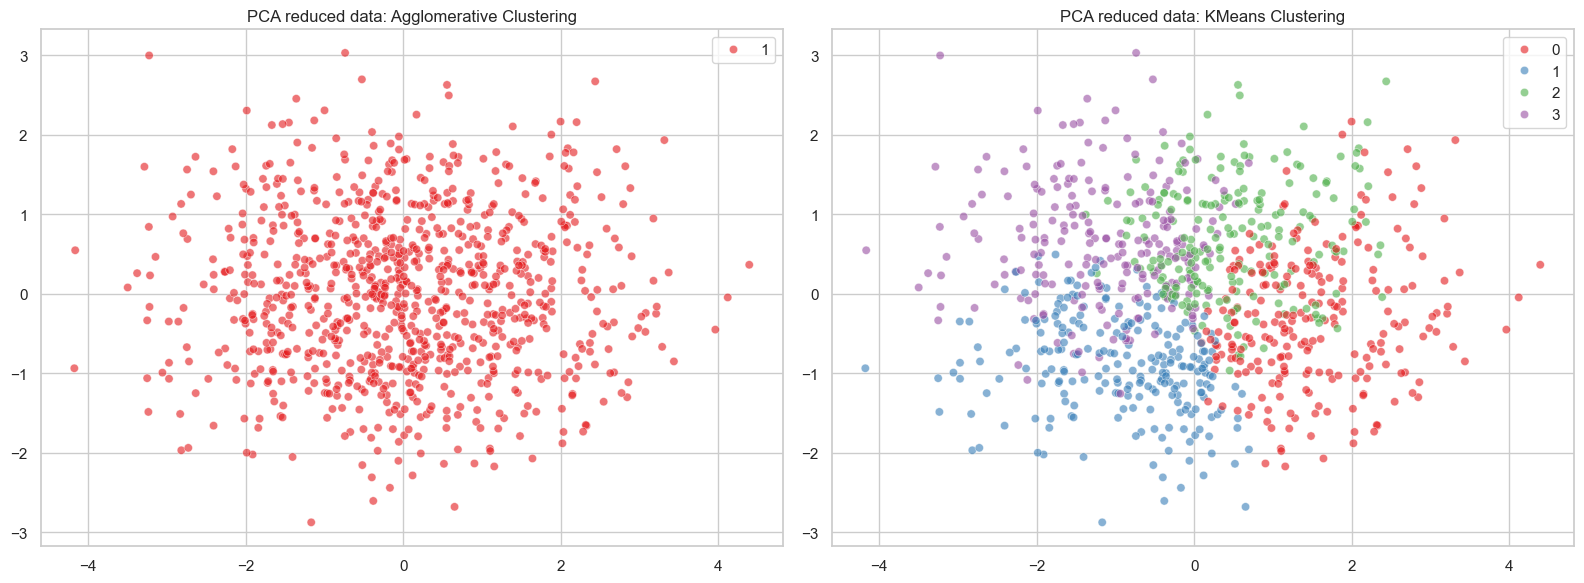

In [22]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data_scaled)

# Визуализация сокращенных данных
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=result, palette='Set1', alpha=0.6)
plt.title('PCA reduced data: Agglomerative Clustering')

plt.subplot(1, 2, 2)
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=labels, palette='Set1', alpha=0.6)
plt.title('PCA reduced data: KMeans Clustering')

plt.tight_layout()
plt.show()

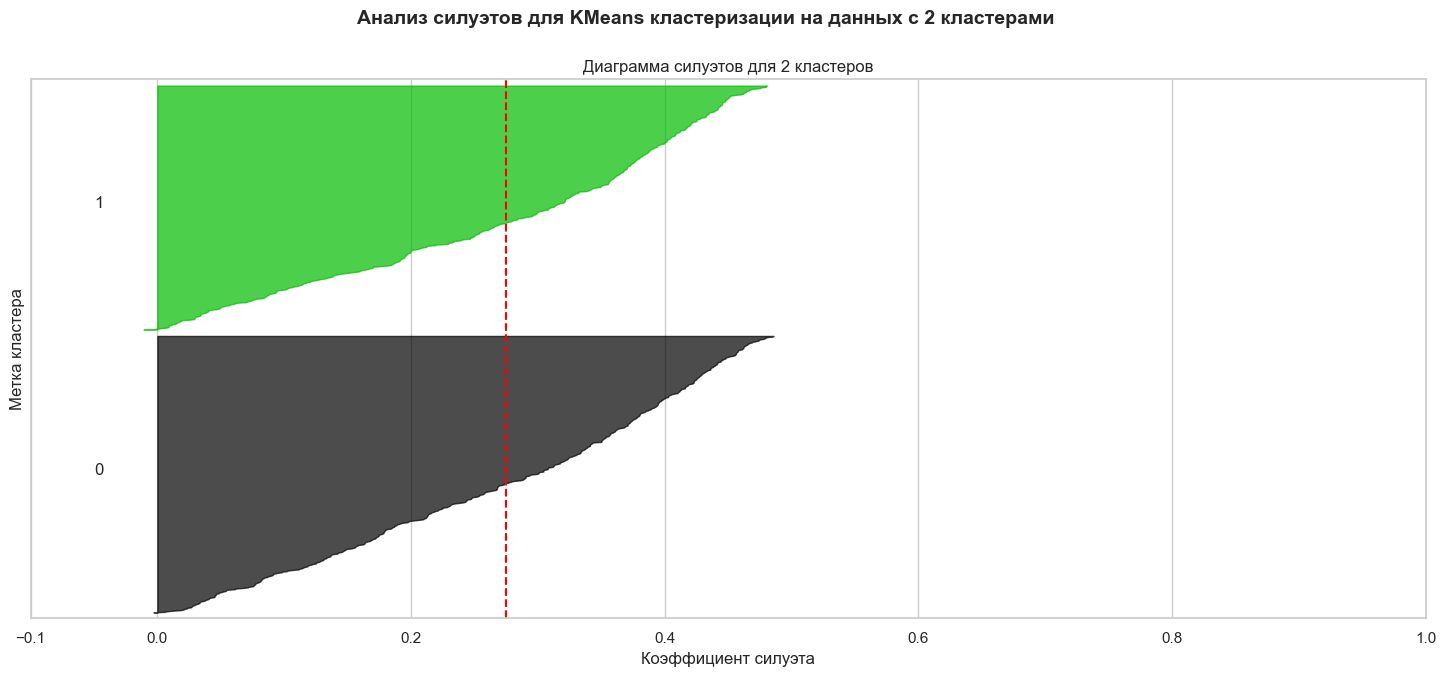

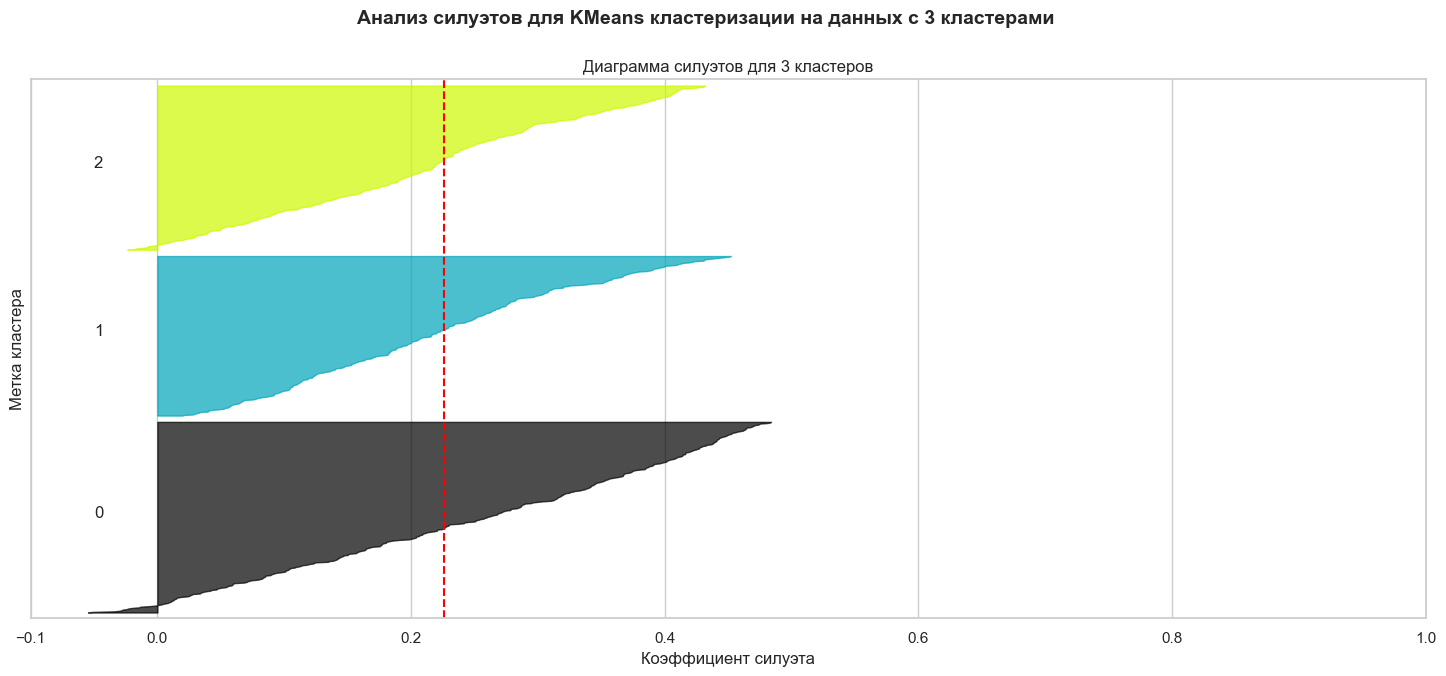

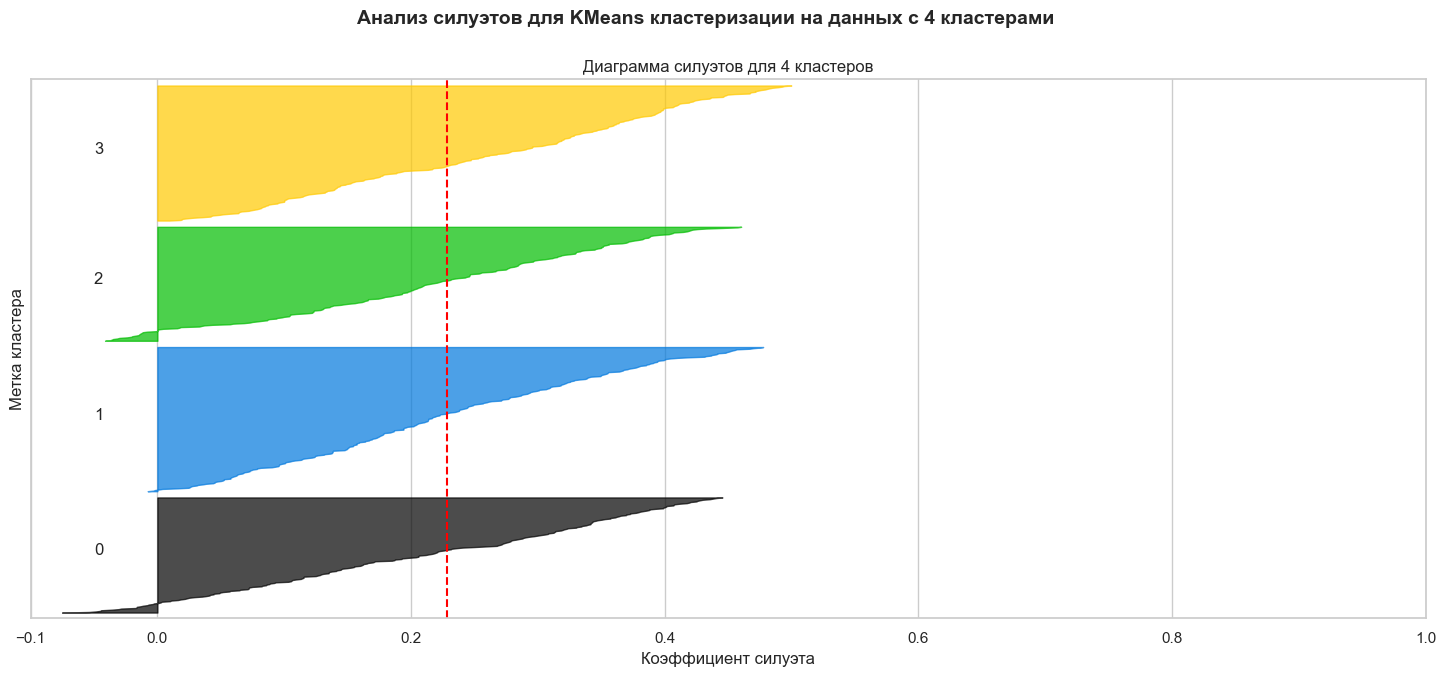

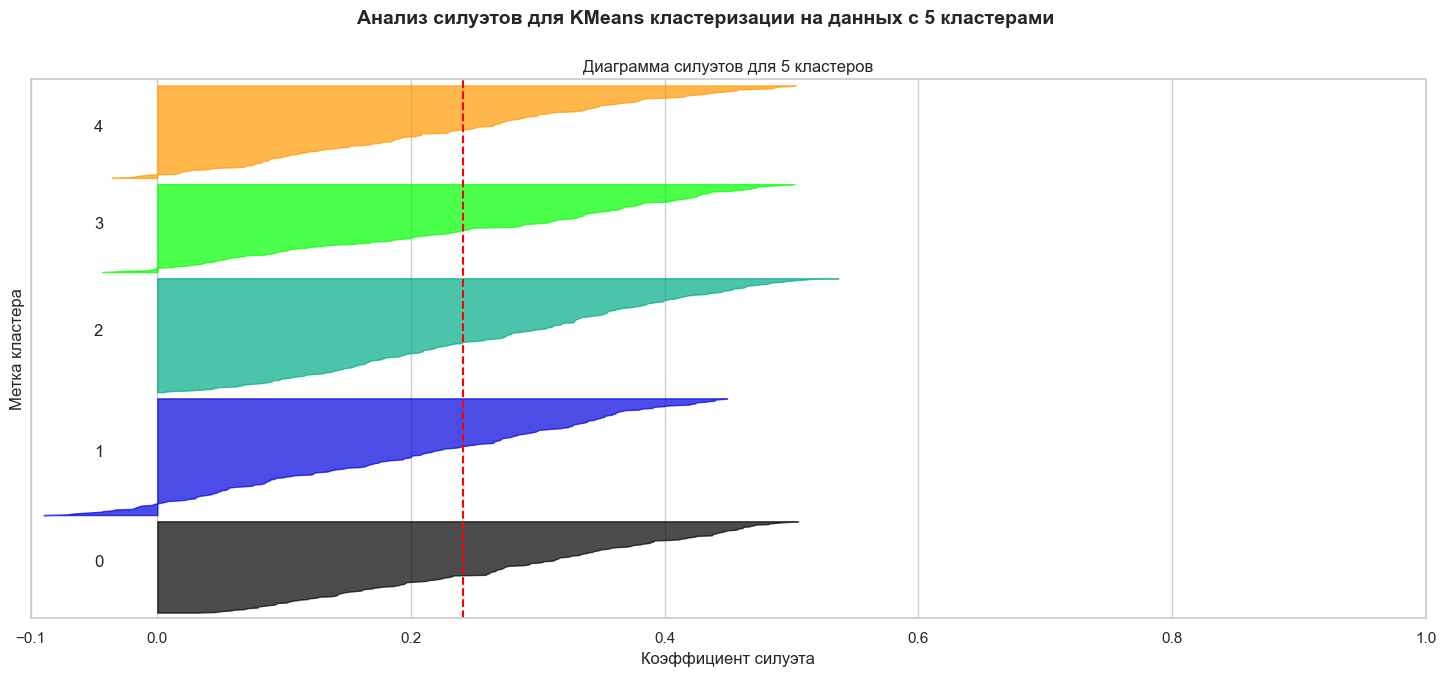

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
# Применение PCA для уменьшения размерности (если нужно)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_scaled)  

random_state = 9

# Функция для вычисления силуэтов
def get_clusters_silhouettes(data, random_state, max_clusters=5):
    silhouettes = []
    for n_clusters in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
        cluster_labels = kmeans.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        sample_silhouette_values = silhouette_samples(data, cluster_labels)
        silhouettes.append((n_clusters, silhouette_avg, sample_silhouette_values, cluster_labels))
    return silhouettes

# Функция для визуализации силуэтов
def draw_silhouettes(data, silhouettes):
    for n_clusters, silhouette_avg, sample_silhouette_values, cluster_labels in silhouettes:
        fig, ax1 = plt.subplots(1, 1)
        fig.set_size_inches(18, 7)

        # Первый график: Диаграмма силуэтов
        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(data) + (n_clusters + 1) * 10])
        y_lower = 10
        for i in range(n_clusters):
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
            color = plt.cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        ax1.set_title("Диаграмма силуэтов для %d кластеров" % n_clusters)
        ax1.set_xlabel("Коэффициент силуэта")
        ax1.set_ylabel("Метка кластера")
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
        ax1.set_yticks([])
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.suptitle(("Анализ силуэтов для KMeans кластеризации на данных с %d кластерами" % n_clusters), fontsize=14, fontweight='bold')

    plt.show()

# Вычисление силуэтов
silhouettes = get_clusters_silhouettes(df_scaled, random_state)

# Визуализация силуэтов
draw_silhouettes(df_scaled, silhouettes)